In [32]:
import os 
from glob import glob

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

# 이미지 경로들 부르고, Label 얻기  

이미지 데이터들이 저장된 파일 목록들을 불러와 경로들을 List로 저장하고  
각 경로들을 통해 Label(Class)를 얻는다. 

In [2]:
os.listdir()  # 같은 경로 레벨에 있는 파일들의 목록을 보여준다. 

['.ipynb_checkpoints', 'data', 'data_manager (mnist).ipynb']

In [3]:
os.listdir('data/')  # 해당 경로 안에서의 폴더 목록을 list로 반환

['mnist_png', 'mnist_png.rar', 'train', 'train.7z', 'trainLabels.csv']

In [4]:
data_list = glob('data\\mnist_png\\mnist_png\\training\\*\\*.png')  # 모든 경로들을 list로 반환

In [5]:
path = data_list[0]
path

'data\\mnist_png\\mnist_png\\training\\0\\1.png'

In [6]:
def get_label_from_path(path):
    return path.split('\\')[-2]

In [7]:
path, get_label_from_path(path)  # 제대로 뽑아졌는지 확인 

('data\\mnist_png\\mnist_png\\training\\0\\1.png', '0')

다시 제대로 뽑아지는지 랜덤하게 넣어서 확인 해보자

In [8]:
rand_n = 9999

path = data_list[rand_n]
path, get_label_from_path(path)  # 제대로 뽑아졌는지 확인 

('data\\mnist_png\\mnist_png\\training\\1\\42015.png', '1')

## 이미지 불러오기 & Label - onehot-encoding 불러오기
여기까지는 경로와 Label 이름을 뽑는 것이 제대로 확인이 되었다.  
이제부터 그 경로와 Label명을 통해 one-encoding을 만들것이다. 

In [9]:
# path로 부터 Image 불러오기
image = np.array(Image.open(path))

In [10]:
def read_image(path):
    image = np.array(Image.open(path))
    # Channel 1을 살려주기 위해 reshape 해줌
    return image.reshape(image.shape[0], image.shape[1], 1)

In [11]:
# label 이름을 통해 onehot-encoding 하기 
class_name = get_label_from_path(path)

In [12]:
# 앞서 만들었던 get_label_from_path 함수를 통해 data_list에 있는 label 이름들을 list에 다 묶어준다
# 더 쉬운 방법이 있지만, 굳이 함수를 통해 label 들을 얻는 것은 함수도 잘 작동하는지 확인함을 목적을 가지고 있다. 

label_name_list = []
for path in data_list:
    label_name_list.append(get_label_from_path(path))

In [13]:
unique_label_names = np.unique(label_name_list)
unique_label_names

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [14]:
def onehot_encode_label(path):
    onehot_label = unique_label_names == get_label_from_path(path)
    onehot_label = onehot_label.astype(np.uint8)
    return onehot_label

In [15]:
onehot_encode_label(path)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [17]:
# 이미지 읽고(array로 열면 너무 크기 때문에 여기선 shape로 확인), onehot_label 확인
read_image(path).shape, onehot_encode_label(path)

((28, 28, 1), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8))

## Batch Data 만들기  
앞에 Image를 부르고, onehot_enocding도 했으니 이걸로 batch 만들기  

방법.1  
- Empty Array 를 만들고 그 Array에 이미지 한장 한장 채운다 

방법. 2  
- 이미지 한장 한장씩 Batch Size 만큼 붙여 간다 (concatenation)

In [18]:
image.shape

(28, 28)

In [25]:
# Hyper Parameter 
batch_size = 64
data_height = 28
data_width = 28
channel_n = 1

num_classes = 10

In [26]:
# 방법.1 - Empty Array를 만들고 채워가는 방법

batch_image = np.zeros((batch_size, data_height, data_width, channel_n))
batch_label = np.zeros((batch_size, num_classes))

In [27]:
batch_image.shape, batch_label.shape

((64, 28, 28, 1), (64, 10))

In [28]:
for n, path in enumerate(data_list[:batch_size]):
    image = read_image(path)
    onehot_label = onehot_encode_label(path)
    batch_image[n, :, :, :] = image
    batch_label[n, :] = onehot_label

In [30]:
batch_image.shape, batch_label.shape

((64, 28, 28, 1), (64, 10))

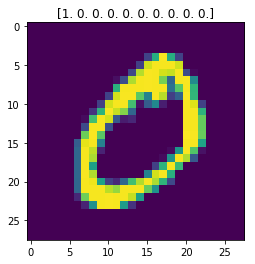

In [37]:
test_n = 0
plt.title(batch_label[test_n])
plt.imshow(batch_image[test_n, :, :, 0])
plt.show()